# Estimating Demand Curve using Ordinary Least Square Regression

## Step 1: Collecting and Cleaning Data

For this analysis, I am collecting data on the price and quantity of tomatoes in Pashim Bardhaman vegetable market from September 1 to October 30. The data is sourced from [Agmarknet](https://agmarknet.gov.in/), a government platform providing market prices and related agricultural information. This data will form the basis for estimating the demand curve for tomatoes in the region using ordinary least squares (OLS) regression. The collected data will include the price of tomatoes and the corresponding quantity sold in various markets during the specified period.

- The data has been sorted by reported date and only the relevant columns are recorded.
- Since linear regression is sensitive to scale, changing the price unit from Rs./Quintal to Rs./kg and quantity from Tonnes to Quintals so that price and quantity are on the same level of magnitude and it becomes easier for us to calculate the regression coefficients.

In [48]:
import pandas as pd
df = pd.read_html("agmarknet_price_arrival.html")[0]
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d %b %Y')
df = df.sort_values(by="Reported Date")
df['Modal Price (Rs./kg)'] = df['Modal Price (Rs./Quintal)'] / 100
df['Arrivals (Quintals)'] = df['Arrivals (Tonnes)'] * 10
df_cleaned = df[['Modal Price (Rs./kg)', 'Arrivals (Quintals)']].copy()
df_cleaned.rename(columns={'Arrivals (Quintals)': 'Quantity (Quintals)'}, inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
print(df_cleaned)

     Modal Price (Rs./kg)  Quantity (Quintals)
0                    28.0                 52.0
1                    28.5                 53.0
2                    28.0                 52.0
3                    30.0                 50.0
4                    30.5                 52.0
..                    ...                  ...
114                  62.5                 35.0
115                  57.5                 37.0
116                  58.0                 36.0
117                  59.0                 37.0
118                  58.0                 37.0

[119 rows x 2 columns]


- The **modal price** is the independent variable (**Y**) and **quantity demanded/sold** as the dependent variable (**X**).

In [49]:
df_cleaned.columns = ['X', 'Y']
print(df_cleaned)

        X     Y
0    28.0  52.0
1    28.5  53.0
2    28.0  52.0
3    30.0  50.0
4    30.5  52.0
..    ...   ...
114  62.5  35.0
115  57.5  37.0
116  58.0  36.0
117  59.0  37.0
118  58.0  37.0

[119 rows x 2 columns]


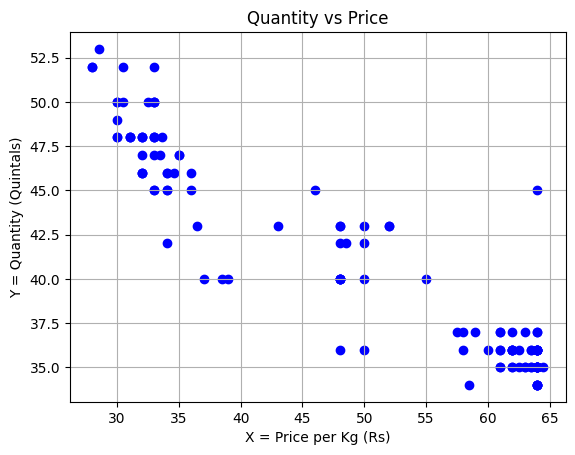

In [50]:
import matplotlib.pyplot as plt
plt.scatter(df_cleaned['X'], df_cleaned['Y'], color='blue')
plt.xlabel('X = Price per Kg (Rs)')
plt.ylabel('Y = Quantity (Quintals)')
plt.title('Quantity vs Price')
plt.grid()
plt.show()

- There are 119 datapoints. 

## Step 2: Creating Regression Model

Our linear regression model is
$$\begin{align}
    Y = A+B X.
  \end{align}
$$

For each $x_i$, let $\hat{y}_i$ be the fitted value. Then, the error for every datapoint $i$ is given by
$$e_i=y_i-\hat{y}_i=y_i-A-B x_i$$

The sum of the squared errors is given by
$$\sum_{i=1}^{n} e_i^2=\sum_{i=1}^{n} (y_i-A-B x_i)^2$$

Let sum of the squared errors be represented by the function $E(A, B)$.
$$E(A, B)=\sum_{i=1}^{n} e_i^2$$

To find the best fit for the data, we find the values of $A$ and $B$ such that $E(A,B)$ is minimized. This can be done by taking partial derivatives with respect to $A$ and $B$, and setting them to zero. We obtain
$$\frac{\partial E}{\partial A}=\sum_{i=1}^{n} 2(-1)(y_i-A-B x_i)=0
$$
$$
	\frac{\partial E}{\partial B}=\sum_{i=1}^{n} 2(-x_i)(y_i-A-B x_i)=0.
$$

By solving the above two equations we get
$$
\hat{B} = \frac{\sum_{i=1}^{n} (x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^n (x_i-\overline{x})^2}
$$
$$
\hat{A} = \overline{y} - \hat{B} \overline{x}
$$
where 
$$
\overline{x}=\frac{x_1+x_2+...+x_n}{n}
$$
$$
\overline{y}=\frac{y_1+y_2+...+y_n}{n}
$$

So finally, the above formulas give us the regression line
$$\hat{y}_i = \hat{A}+\hat{B} x_i$$
where $\hat{A}$, $\hat{B}$ are **least square estimates** of $A$ and $B$. 

## Step 3: Calculation

First, we will calculate the means of $x$ and $y$.

In [51]:
x_mean = df_cleaned['X'].mean().round(4)
y_mean = df_cleaned['Y'].mean().round(4)
print(f"Mean of X (Modal Price): {x_mean}")
print(f"Mean of Y (Quantity): {y_mean}")

Mean of X (Modal Price): 48.6193
Mean of Y (Quantity): 41.1765


Now, we will calculate the other necessary summation values.

In [52]:
df_cleaned['X - X̄'] = df_cleaned['X'] - x_mean
df_cleaned['Y - Ȳ'] = df_cleaned['Y'] - y_mean
df_cleaned['(X - X̄)(Y - Ȳ)'] = df_cleaned['X - X̄'] * df_cleaned['Y - Ȳ']
df_cleaned['(X - X̄)^2'] = df_cleaned['X - X̄'] ** 2

df_cleaned = df_cleaned.round(4)
print(df_cleaned)

        X     Y   X - X̄   Y - Ȳ  (X - X̄)(Y - Ȳ)  (X - X̄)^2
0    28.0  52.0 -20.6193  10.8235         -223.1730    425.1555
1    28.5  53.0 -20.1193  11.8235         -237.8805    404.7862
2    28.0  52.0 -20.6193  10.8235         -223.1730    425.1555
3    30.0  50.0 -18.6193   8.8235         -164.2874    346.6783
4    30.5  52.0 -18.1193  10.8235         -196.1142    328.3090
..    ...   ...      ...      ...               ...         ...
114  62.5  35.0  13.8807  -6.1765          -85.7341    192.6738
115  57.5  37.0   8.8807  -4.1765          -37.0902     78.8668
116  58.0  36.0   9.3807  -5.1765          -48.5592     87.9975
117  59.0  37.0  10.3807  -4.1765          -43.3550    107.7589
118  58.0  37.0   9.3807  -4.1765          -39.1785     87.9975

[119 rows x 6 columns]


In [53]:
s_xy = df_cleaned['(X - X̄)(Y - Ȳ)'].sum()
s_xx = df_cleaned['(X - X̄)^2'].sum()
print(f"Σ(X - X̄)(Y - Ȳ) = {s_xy:.3f}")
print(f"Σ(X - X̄)^2 = {s_xx:.3f}")
print(f"Mean of X (X̄) = {x_mean:.3f}")
print(f"Mean of Y (Ȳ) = {y_mean:.3f}")

Σ(X - X̄)(Y - Ȳ) = -8874.306
Σ(X - X̄)^2 = 22734.522
Mean of X (X̄) = 48.619
Mean of Y (Ȳ) = 41.176


In [54]:
B = s_xy / s_xx
A = y_mean - B * x_mean

print(f"Slope (B) = {B:.2f}")
print(f"Intercept (A) = {A:.2f}")

Slope (B) = -0.39
Intercept (A) = 60.15


So we have,
$$
\hat{B} = \frac{\sum_{i=1}^{n} (x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^n (x_i-\overline{x})^2} = \frac{-8874.306}{22734.522} = -0.39
$$
$$
\hat{A} = \overline{y} - \hat{B} \overline{x} = 41.176 - (-0.39)48.619 = 60.15
$$

Finally, the demand curve equation is 
$$ Y = 60.15 - 0.39X$$

## Step 4: Plotting the data points and the best fitted line

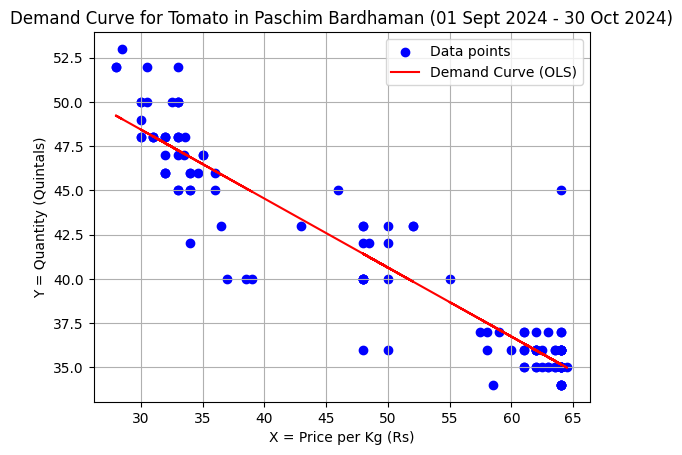

In [55]:
plt.scatter(df_cleaned['X'], df_cleaned['Y'], color='blue', label='Data points')
plt.plot(df_cleaned['X'], A + B * df_cleaned['X'], color='red', label='Demand Curve (OLS)')
plt.xlabel('X = Price per Kg (Rs)')
plt.ylabel('Y = Quantity (Quintals)')
plt.title('Demand Curve for Tomato in Paschim Bardhaman (01 Sept 2024 - 30 Oct 2024)')
plt.legend()
plt.grid()
plt.savefig('demand_curve_tomato.png', dpi=300)  
plt.show()

## Step 5: Conclusion

The plot clearly shows the demand curve, which represents the relationship between the price of tomatoes and the quantity demanded. As observed from the plot, the best-fit line indicates a negative slope, suggesting an inverse relationship between the price and quantity demanded. This means that, as the price of tomatoes increases, the quantity demanded decreases, which is consistent with the **Law of Demand** in economics.